In [1]:
import psycopg
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt 
 

In [2]:
db_config = {'user':'jeffrey', 'password':'strawberries', 'host':'127.0.0.1', 'port':'5432', 'dbname':'trader', 'autocommit':True}
db_conn = psycopg.connect(**db_config)
db_cur = db_conn.cursor()

In [3]:
month_= datetime.now().month
day_= datetime.now().day

In [7]:
#select_01 = """SELECT * FROM reqid_list WHERE EXTRACT(DAY FROM send_time) = 29;"""
#select_02 = """SELECT id FROM reqid_list WHERE symbol = 'SPX' AND EXTRACT(DAY FROM send_time) = 29;"""
#select_03 = """SELECT * from reqid_list WHERE id = '243';"""
#select_04 = """SELECT * from reqid_list;"""
#select_05 = """SELECT id FROM reqid_list WHERE symbol = 'SPX' AND EXTRACT(MONTH FROM send_time) = 06 AND EXTRACT(DAY FROM send_time) = 3;"""
#select_06 = """SELECT reqid FROM reqid_list WHERE id = 258;"""
#select_07 = """SELECT * from tick_price WHERE reqid = 103 AND name = 'LAST' AND EXTRACT(MONTH FROM recv_time) = 05 AND EXTRACT(DAY FROM recv_time) = 31;
#select_08= f"SELECT * from tick_price WHERE reqid = 103 AND name = 'LAST' AND EXTRACT(MONTH FROM recv_time) = {month_} AND EXTRACT(DAY FROM recv_time) = {day_}"

select_09 = f"SELECT * FROM tick_price WHERE recv_time::date = current_date AND reqid = 103 AND name = 'LAST';"


In [8]:
result = db_cur.execute(select_09)
data = result.fetchall()

In [9]:
# find the unique id associated with today's SPX data

select_str = f"SELECT id FROM reqid_list WHERE symbol = 'SPX' AND EXTRACT(MONTH FROM send_time) = {month_} AND EXTRACT(DAY FROM send_time) = {day_};"
result= db_cur.execute(select_str)
spx_id= result.fetchall()[0][0]
print(spx_id)

select_str = f"SELECT id FROM reqid_list WHERE symbol = 'AMD' AND EXTRACT(MONTH FROM send_time) = {month_} AND EXTRACT(DAY FROM send_time) = {day_};"
result= db_cur.execute(select_str)
amd_id= result.fetchall()[0][0]
print(amd_id)

1649
1650


In [10]:
select_str = f'SELECT reqid FROM reqid_list WHERE id = {spx_id} AND EXTRACT(MONTH FROM send_time) = {month_} AND EXTRACT(DAY FROM send_time) = {day_};'
result = db_cur.execute(select_str)
spx_reqid = result.fetchall()[0][0]
name_ = 'LAST'
print(spx_reqid)

select_str = f'SELECT reqid FROM reqid_list WHERE id = {amd_id} AND EXTRACT(MONTH FROM send_time) = {month_} AND EXTRACT(DAY FROM send_time) = {day_};'
result = db_cur.execute(select_str)
amd_reqid = result.fetchall()[0][0]
name_ = 'LAST'
print(amd_reqid)


103
202


In [11]:
name_ = "LAST"

#SELECT recv_time,price FROM tick_price WHERE reqid = 103 AND name = 'LAST' AND EXTRACT(MONTH FROM recv_time) = 6 AND EXTRACT(DAY FROM recv_time) = 17;

spx_select_str = """SELECT recv_time,price FROM tick_price WHERE reqid = """ + str(spx_reqid) + """ AND name = 'LAST' AND EXTRACT(MONTH FROM recv_time) = """ + str(month_) + """ AND EXTRACT(DAY FROM recv_time) = """ + str(day_) + """;"""
#spx_select_str = f'SELECT recv_time,price FROM tick_price WHERE reqid = {spx_reqid} AND name = "{name_}" AND EXTRACT(MONTH FROM recv_time) = {month_} AND EXTRACT(DAY FROM recv_time) = {day_};'
result = db_cur.execute(spx_select_str)
spx_today= result.fetchall()

#amd_select_str = """SELECT recv_time,price FROM tick_price WHERE reqid = 202 AND name = 'LAST' AND EXTRACT(MONTH FROM recv_time) = 6 AND EXTRACT(DAY FROM recv_time) = 17;"""
##amd_select_str = f'SELECT recv_time,price FROM tick_price WHERE reqid = {amd_reqid} AND name = "{name_}" AND EXTRACT(MONTH FROM recv_time) = {month_} AND EXTRACT(DAY FROM recv_time) = {day_};'
#result = db_cur.execute(amd_select_str)
#amd_today= result.fetchall()

In [12]:
#column_names_ = ['source', 'reqid','recv_time', 'field','name', 'price', 'attributes', 'id']
column_names_ = ['recv_time','price']

# convert database query result into pandas dataframe
df_spx = pd.DataFrame(spx_today, columns=column_names_)

# convert 'decimal' objects to numeric type (float in this case)
df_spx["price"] = df_spx["price"].apply(pd.to_numeric, downcast='float')

# databse inserts are not guaranteed to be sequential in time (will not be most likely)
# df.sort_values returns the sorted dataframe as a return object, unless the flag inplace=True is set.  this modifies the existing dataframe by sorting it 
df_spx.sort_values('recv_time', ascending=True, inplace=True)

In [13]:
%matplotlib widget

<Axes: xlabel='recv_time'>

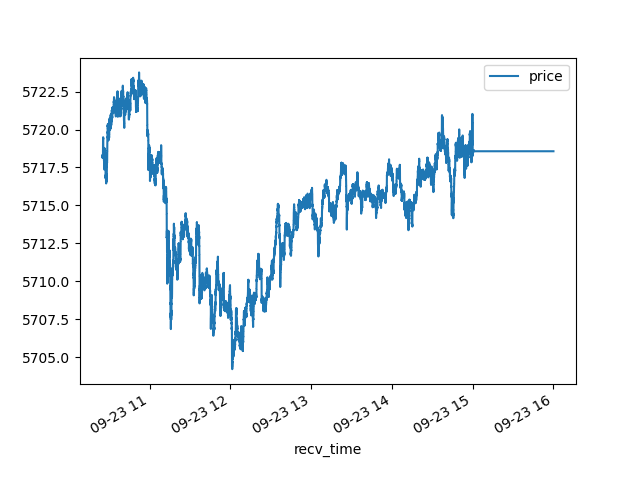

In [14]:
df_spx.plot(x="recv_time",y="price")

In [ ]:
# consecutive steps down or up
# instantaneous changes
# moving averages
#    various time based
#    various sequence based
#    derivatives
#        increasing or decreasing
#            various time windows of increasing or decreasing
#        rate of change / acceleration
#        acceleration
#    inflections
#

In [ ]:
plt.plot(df_spx["recv_time"], df_spx["price"]) 
plt.show() 

In [ ]:

df_spx.head()
